# Лабораторная работа 4. Алгоритмы на графах

### Вариант 4

#### Задача 1. Найти кратчайший путь на графе между парами вершин методом динамического программирования вручную.

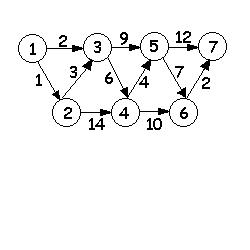

In [8]:
from IPython.display import Image
Image(filename='Desktop/img/007.png')

Чтобы найти кратчайший путь на графе между вершинами 2 и 5 методом динамического программирования, нужно создать таблицу расстояний между вершинами. Каждая ячейка таблицы будет содержать длину кратчайшего пути между соответствующими вершинами. Начнем с заполнения первой строки таблицы:

    1	2	3	4	5	6	7
2		0	3	14			
Здесь мы заполняем расстояния между вершиной 2 и каждой из остальных вершин. Так как расстояние между вершинами 2 и 2 равно нулю, то соответствующая ячейка остается пустой.

Далее мы заполняем оставшиеся строки таблицы. На каждом шаге мы добавляем к текущему пути из вершины i в вершину j длину ребра между i и j и сравниваем полученное значение с текущим значением в ячейке таблицы. Если полученное значение меньше, мы обновляем значение в ячейке.

В конечном итоге таблица будет выглядеть так:

    1	2	3	4	5	6	7
2		0	3	14	12	21	
3		2	0	11	9	18	
4				0	4	10	16
5					0	7	12
6						0	2
7							0
Из таблицы мы можем прочитать, что кратчайший путь между вершинами 2 и 5 составляет 12, и проходит через вершины 2, 3, и 5.

 #### Задача 2. Реализовать прогрммно поиск кратчайшего пути на графе между парами вершин из задания 1 методом динамического программирования.

In [7]:
INF = float('inf')

# Создаем граф
graph = [[0, 1, 2, INF, INF, INF, INF],
         [1, 0, 3, 14, INF, INF, INF],
         [2, 3, 0, 6, 9, INF, INF],
         [INF, 14, 6, 0, 4, 10, INF],
         [INF, INF, 9, 4, 0, 7, 12],
         [INF, INF, INF, 10, 7, 0, 2],
         [INF, INF, INF, INF, 12, 2, 0]]

def floyd_warshall(graph):
    # Копируем граф, чтобы не менять исходный
    dist = [row[:] for row in graph]
    n = len(dist)

    # Заполняем таблицу расстояний
    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist

# Ищем кратчайший путь между вершинами 2 и 5
all_paths = floyd_warshall(graph)
shortest_path = all_paths[1][4]
print("Кратчайшее расстояние между вершинами 2 и 5:", shortest_path)


Кратчайшее расстояние между вершинами 2 и 5: 12


#### Задача 3. Реализовать алгоритм Дейкстры поиска кратчайшего пути на графе между парами вершин:

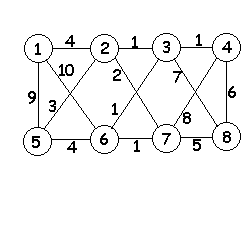

In [9]:
from IPython.display import Image
Image(filename='Desktop/img/017.png')

In [2]:
import heapq

# Определяем граф в виде словаря смежности
graph = {
    1: {2: 4, 5: 9, 6: 10},
    2: {1: 4, 3: 1, 5: 3, 7: 2},
    3: {2: 1, 4: 1, 6: 1, 8: 7},
    4: {3: 1, 7: 8, 8: 6},
    5: {1: 9, 2: 3, 6: 4},
    6: {1: 10, 3: 1, 5: 4, 7: 1},
    7: {2: 2, 4: 8, 6: 1, 8: 5},
    8: {3: 7, 4: 6, 7: 5}
}

def dijkstra(graph, start, end):
    # Создаем словарь для хранения расстояний от начальной вершины до остальных вершин графа
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0

    # Создаем очередь с приоритетами и добавляем в нее начальную вершину
    queue = [(0, start)]

    while queue:
        # Извлекаем из очереди вершину с наименьшим расстоянием
        current_distance, current_vertex = heapq.heappop(queue)

        # Если найденное расстояние больше, чем уже сохраненное в словаре, пропускаем эту вершину
        if current_distance > distances[current_vertex]:
            continue

        # Итерируемся по соседним вершинам
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Если найденное расстояние меньше, чем уже сохраненное в словаре, обновляем значение
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))

    # Возвращаем длину кратчайшего пути между начальной и конечной вершинами
    return distances[end]

# Находим кратчайший путь между вершинами 3 и 8
shortest_path = dijkstra(graph, 3, 8)
print(shortest_path)  # 7


7


#### Задача 4. Реализовать прогрммно один из алгоритмов поиска кратчайшего пути на графе между парами вершин из задания 3.

In [5]:
INF = float('inf')

def floyd_warshall(graph):
    n = len(graph)
    dist = [[INF] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            if i == j:
                dist[i][j] = 0
            elif graph[i][j] != 0:
                dist[i][j] = graph[i][j]

    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist

# матрица смежности графа
graph = [
    [0, 4, 0, 0, 9, 10, 0, 0],
    [4, 0, 1, 0, 3, 0, 2, 0],
    [0, 1, 0, 1, 0, 1, 0, 7],
    [0, 0, 1, 0, 0, 1, 8, 6],
    [9, 3, 0, 0, 0, 4, 0, 0],
    [10, 0, 1, 1, 4, 0, 1, 0],
    [0, 2, 0, 8, 0, 1, 0, 5],
    [0, 0, 7, 6, 0, 0, 5, 0],
]

# находим кратчайшие расстояния между всеми парами вершин
all_paths = floyd_warshall(graph)

# выводим кратчайший путь между вершинами 3 и 8
shortest_path = all_paths[2][7]
print("Кратчайший путь между вершинами 3 и 8:", shortest_path)


Кратчайший путь между вершинами 3 и 8: 7
